# Aviation Data Phase 1



### Overview





Our company is exploring expansion into new industries to diversify its portfolio. Specifically, the focus is on purchasing and operating aircraft for commercial and private purposes. The challenge lies in identifying the lowest risk aircraft to ensure a safe and profitable venture into aviation. 

### Data Understanding

The data being used in this notebook is an aviation dataset provided by the National Transportation Safety Board (NTSB), which encompasses civil aviation accident data from 1962 to 2023. This dataset includes information about accidents and selected incidents in the United States and international waters.

First steps are to import all necessary libraries used in data analysis, followed by creating the dataframe "planes_df" using Pandas to read the Aviation Data CSV dataset.  Next, we view all columns and Dtypes of the columns to better understand what we are working with.

In [97]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

planes_df = pd.read_csv('Aviation_Data.csv')
planes_df.info()


C:\Users\neali\AppData\Local\Temp\ipykernel_5736\749912829.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  planes_df = pd.read_csv('Aviation_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Data Preparation

First, the data needs to be cleaned, as there are a lot of duplicate/similar values just spelled differently.  The process of cleaning the data starts by removing all NAs and normalizing the data for several different Makes.

#### Creating a New Column for Total Injuries
To capture the overall impact of each aviation incident in terms of human harm, we introduced a new column in the dataframe named Total Injuries. This column is computed by considering not just the number of injuries, but also their severity. The formula used takes into account fatal injuries, serious injuries, and minor injuries, each weighted differently to reflect their severity:

Fatal injuries are given the highest weight of 0.6, reflecting their severe outcome.
Serious injuries are weighted at 0.4, indicating their significant but non-lethal impact.
Minor injuries, being the least severe, are assigned a weight of 0.2.

The Total Injuries column is thus a weighted sum of these three types of injuries for each aviation incident, providing a nuanced view of the incidents' severity in terms of human injuries.

#### Weighted Index for Injury Severity
The decision to create a weighted index for calculating Total Injuries stems from the understanding that not all injuries have the same impact on health and well-being. Fatal injuries are irreversible, serious injuries can have long-term health implications, and minor injuries, while impactful, are typically recoverable. This weighting system allows for a more detailed analysis of the incidents, beyond simple injury counts, by incorporating the gravity of the injuries sustained.



In [57]:


#Fill in all null values in Injuries columns
planes_df['Total.Fatal.Injuries'].fillna(0, inplace=True) 
planes_df['Total.Serious.Injuries'].fillna(0,inplace=True)
planes_df['Total.Minor.Injuries'].fillna(0,inplace=True)

#Normalize Data
planes_df["Make"] = planes_df["Make"].replace("Boeing", "BOEING")
planes_df["Make"] = planes_df["Make"].replace("BOEING-VERTOL", "BOEING")
planes_df["Make"] = planes_df["Make"].replace("Airbus Industrie", "AIRBUS")
planes_df["Make"] = planes_df["Make"].replace("AIRBUS INDUSTRIE", "AIRBUS")
planes_df["Make"] = planes_df["Make"].replace("Airbus", "AIRBUS")
planes_df["Make"] = planes_df["Make"].replace("CESSNA", "Cessna")
planes_df["Make"] = planes_df["Make"].replace("PIPER", "Piper")
planes_df["Make"] = planes_df["Make"].replace("BEECH", "Beech")

#removing any leading or trailing whitespace
planes_df['Make'] = planes_df['Make'].str.strip()

#create new column documenting total injuries, fatal + major + minor
#created weighted index based on fatal vs serious vs minor injuries
planes_df['Total Injuries'] = planes_df['Total.Fatal.Injuries'] * 0.6 + planes_df['Total.Serious.Injuries'] * 0.4 + planes_df['Total.Minor.Injuries'] * 0.2








C:\Users\neali\AppData\Local\Temp\ipykernel_5736\3523357594.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  planes_df = pd.read_csv('Aviation_Data.csv')


### Data Analysis
At this step in the process, we will begin compartmentalizing data and taking detailed looks at each aspect we want to investigate further in order to discover appropriate stakeholder solutions.  

The first comparison we want to explore is how number of engines relates to Total injuries

In [58]:
num_eng = planes_df.groupby('Number.of.Engines')['Total Injuries'].sum().reset_index()
num_eng_sorted = num_eng.sort_values(by='Total Injuries', ascending=False)
num_eng_sorted


,Number.of.Engines,Total Injuries
1,1.0,22399.8
2,2.0,8586.8
4,4.0,1193.8
3,3.0,894.8
0,0.0,522.6
6,8.0,9.0
5,6.0,0.0


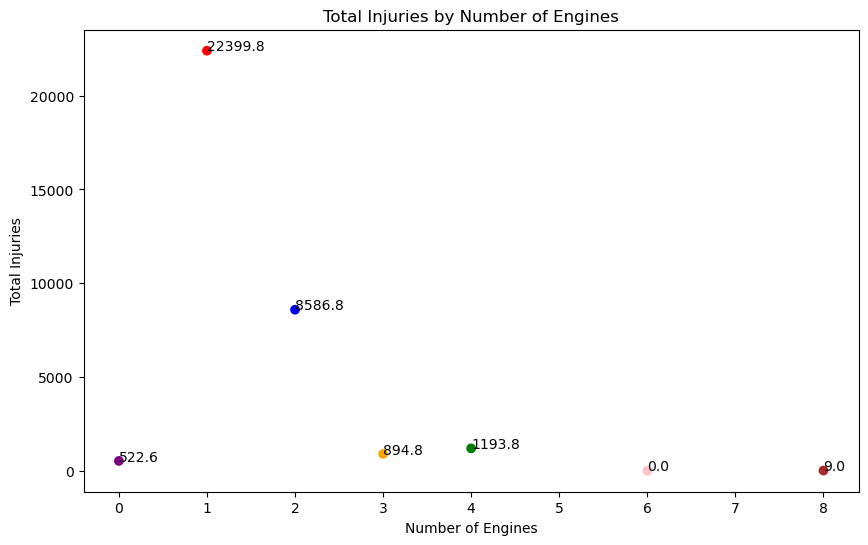

In [59]:
# Define a list of colors, one for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(num_eng_sorted['Number.of.Engines'], num_eng_sorted['Total Injuries'], color= colors)  # Create a scatter plot

# Adding title and labels
plt.title('Total Injuries by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Total Injuries')

# Set x-axis ticks to show each integer interval
plt.xticks(range(int(num_eng_sorted['Number.of.Engines'].min()), int(num_eng_sorted['Number.of.Engines'].max()) + 1))

# Optional: Add text labels next to each point for clarity
for i, txt in enumerate(num_eng_sorted['Total Injuries']):
    plt.annotate(f"{txt:.1f}", (num_eng_sorted['Number.of.Engines'].iat[i], num_eng_sorted['Total Injuries'].iat[i]))

# Show the plot
plt.show()

The scatter plot visualizes the total number of injuries sustained in aviation incidents, categorized by the number of engines on the involved aircraft. Each point on the graph represents the sum of weighted injuries for a given number of engines, indicating a possible correlation between the number of engines and the total injuries recorded.

From the graph, we can observe the following:

Aircraft with two engines have the highest total of weighted injuries, followed by those with one and three engines. There is a noticeable drop in total injuries for aircraft with more than three engines.

No injuries are associated with aircraft having six engines, while there is a very small number associated with aircraft having eight engines.
The data used to create this graph is derived from a grouped summary of the planes_df dataframe, where injuries are aggregated by the Number.of.Engines column. 

The resulting summary is then sorted in descending order of total injuries, which may provide insights into which engine configurations are more commonly involved in incidents with higher numbers of injurie




### Analyzing Safest and Most Injury Producing Commercial and Military Aircrafts

The next step is to filter further and investigate the most dangerous Commercial and Military Aircrafts.  The assumption being made is that most aircrafts with over 2 engines are commercial and military, also based on the Make (Airbus and Boeing are commercial, Lockheed is military).

The steps taken to complete this analysis are as follows:

-Grouped columns by engine number and manufacturer, calculating total injuries and incident counts.

-Rename the aggregated columns for clarity.

-Compute the injury rate per incident for each group.

-Filter to exclude manufacturers with fewer than 4 incidents, focusing on more reliable data.



In [60]:

#grouping data by number of engines, make, total injuries, counts, and percentage
consolidated_data = planes_df.groupby(['Number.of.Engines','Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

#consolidated_data['Total Injuries sum']= consolidated_data['Total Injuries'].sum()
#consolidated_data['Total Injuries count']= consolidated_data['Total Injuries'].count()

#Name columns
consolidated_data.columns= ['Number.of.Engines','Make', 'Total Injuries', 'Total Incidents']


# Calculate Injury Percentage
consolidated_data['Injury Percentage'] = consolidated_data['Total Injuries'] / consolidated_data['Total Incidents']


#FIlter out Outliers (any Makes with less than 4 incidents)
Consolidated_Filter = consolidated_data[consolidated_data['Total Incidents'] >= 4].head()





Next, we create a visualization to help identify which combinations of aircraft make and engine count have higher injury rates.

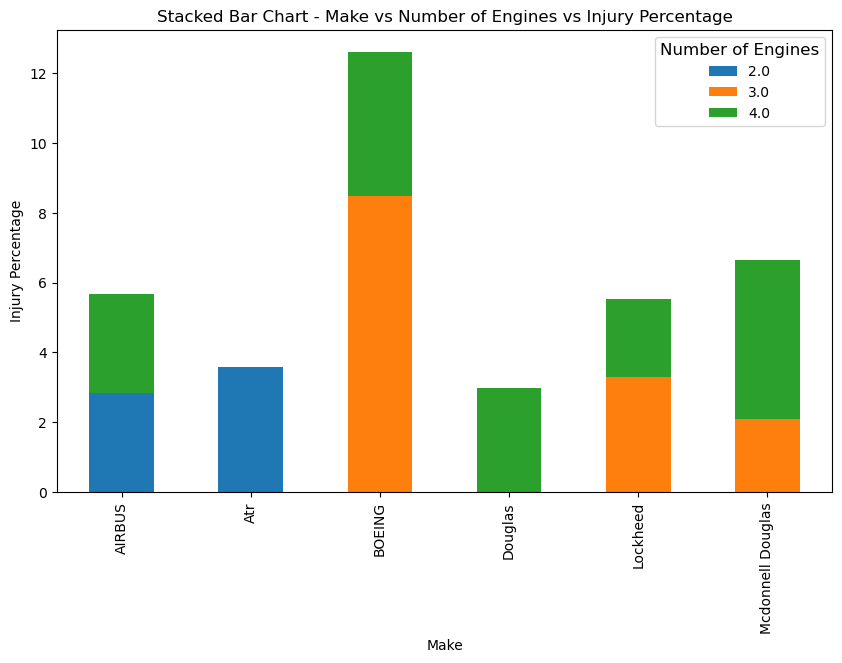

In [61]:
pivot_df = Consolidated_filter.pivot_table(index='Make', columns='Number.of.Engines', values='Injury Percentage', aggfunc='sum', fill_value=0)

# Plot the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart - Make vs Number of Engines vs Injury Percentage')
plt.xlabel('Make')
plt.ylabel('Injury Percentage')
plt.legend(title='Number of Engines', title_fontsize='12')
plt.show()

The above graph shows that Boeing aircrafts have the highest injury percentage per crash with both 3 and 4 engine planes. Mcdonnell Douglas also has a high injury percentage with their 4 engine aircrafts.  

A concrete business takeaway from this display could be to go with AIRBUS for commercial and Lockheed for Military, respectively.

#### Personal Aircraft Analysis

For the next deep dive, the goal is to find injury data for all aircrafts with a "personal" phase of flight value.  The code filters and summarizes planes_df by engine count and flight purpose for aircraft makes, focusing on groups with over 10 incidents and engines up to 2. It calculates injury percentages and filters further for makes with over 500 incidents, showing injury trends per make and engine count.



In [62]:
# Group by specified columns and aggregate Total Injuries
outcome = planes_df.groupby(['Number.of.Engines', 'Purpose.of.flight', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
outcome.columns = ['Number.of.Engines', 'Purpose.of.flight', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
outcome['Injury Percentage'] = outcome['Total Injuries'] / outcome['Total Incidents']


# Filter the DataFrame by 'Injury Percentage' in descending order
outcome = outcome[(outcome['Total Incidents'] > 10) & (outcome['Number.of.Engines'] <= 2)]

#Filtered Data to include total incidents over 500
sum_outcome = outcome.groupby(['Make', 'Number.of.Engines'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
sum_outcome = sum_outcome[sum_outcome['Total Incidents'] > 500]
sum_outcome['Injury Percentage'] = sum_outcome['Total Injuries'] / sum_outcome['Total Incidents']


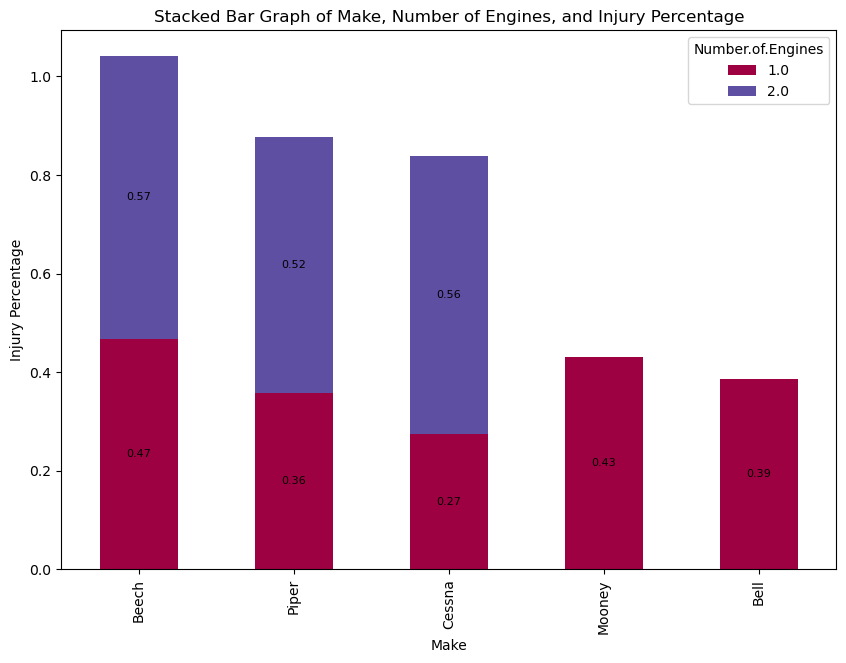

In [102]:
# Plot 1: Bar Plot for Total Injuries
#plt.figure(figsize=(12, 8))
#bar_plot = sum_outcome.groupby(['Make', 'Number.of.Engines'])['Total Injuries'].sum().unstack().plot(kind='bar', stacked=True)
#plt.title('Total Injuries by Make and Number of Engines')
#plt.xlabel('Make')
#plt.ylabel('Total Injuries')
#plt.legend(title='Number of Engines')
#plt.show()

# Plot 2: Bar Plot for Total Incidents and Injury Percentage
# Pivot the data for stacked bar chart
#pivot_df2 = sum_outcome.pivot_table(index='Make', columns='Number.of.Engines', values=['Total Incidents', 'Injury Percentage'], aggfunc='sum', fill_value=0)

# Plot the stacked bar chart with secondary y-axis for Injury Percentage
#fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Incidents on primary y-axis
#pivot_df2['Total Incidents'].plot(kind='bar', stacked=True, ax=ax1, color=['pink', 'blue'], position=1, width=0.4)

# Create a secondary y-axis for Injury Percentage
#ax2 = ax1.twinx()
#pivot_df2['Injury Percentage'].plot(kind='bar', stacked=True, ax=ax2, color=['green', 'red'], position=0, width=0.4)

# Set labels and title
#ax1.set_title('Stacked Bar Chart - Make vs Number of Engines vs Total Incidents and Injury Percentage')
#ax1.set_xlabel('Make')
#ax1.set_ylabel('Total Incidents', color='black')
#ax2.set_ylabel('Injury Percentage', color='black')

# Set legends
#ax1.legend(title='Number of Engines', title_fontsize='12', loc='upper left')
#ax2.legend(title='Number of Engines', title_fontsize='12', loc='upper right')

#plt.show()

# Get the top 5 makes with the largest injury percentage
top_makes = sum_outcome.groupby('Make')['Injury Percentage'].sum().nlargest(5).index
filtered_df = sum_outcome[sum_outcome['Make'].isin(top_makes)]

# Create the pivot table for the filtered DataFrame
pivot_df3 = filtered_df.pivot(index='Make', columns='Number.of.Engines', values='Injury Percentage')

# Sum up the Injury Percentage for each make across all engine types
pivot_df3['Total'] = pivot_df3.sum(axis=1)

# Sort the DataFrame based on the total Injury Percentage across all engine types
pivot_df3_sorted = pivot_df3.sort_values('Total', ascending=False)

# Drop the 'Total' column as it's no longer needed for plotting
pivot_df3_sorted = pivot_df3_sorted.drop('Total', axis=1)

# Plot the graph with the sorted data
ax = pivot_df3_sorted.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(10, 7))

# Add labels and title
plt.xlabel('Make')
plt.ylabel('Injury Percentage')
plt.title('Stacked Bar Graph of Make, Number of Engines, and Injury Percentage')

# Add labels to specific bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Add labels only to bars with a height greater than 0
        plt.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.,
                 '{0:.2f}'.format(height), ha='center', va='center', color='black', fontsize=8)

# Show the plot
plt.show()

The visualization shows that Cessna 1 engine planes and Piper 2 engine planes have the lowest injury percentages, making each a logical choice for safest aircraft/make to choose for 1 and 2 engine planes, respectively.

### Analyze data to show highest rates of injuries among Phase of Flights

Next, we will analyze safest and most dangerous aircrafts based on Phases of flight (Cruise, Takeoff, Maneuvering, Landing, etc)

The code aggregates total injuries and incidents by flight phase, then calculates and sorts the injury percentage. This offers insights into which flight phases are most associated with injuries.

In [64]:
# Group by specified columns and aggregate Total Injuries
num_phase = planes_df.groupby(['Broad.phase.of.flight'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
num_phase.columns = ['Broad.phase.of.flight', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
num_phase['Injury Percentage'] = num_phase['Total Injuries'] / num_phase['Total Incidents']

num_phase.sort_values(by='Total Injuries', ascending=False)

,Broad.phase.of.flight,Total Injuries,Total Incidents,Injury Percentage
2,Cruise,5483.2,10269,0.533957
9,Takeoff,4828.6,12493,0.386504
6,Maneuvering,4354.6,8144,0.534700
0,Approach,3578.4,6546,0.546654
1,Climb,1492.0,2034,0.733530
5,Landing,1446.2,15428,0.093739
3,Descent,936.6,1887,0.496343
4,Go-around,631.8,1353,0.466962
11,Unknown,472.4,548,0.862044
8,Standing,272.4,945,0.288254


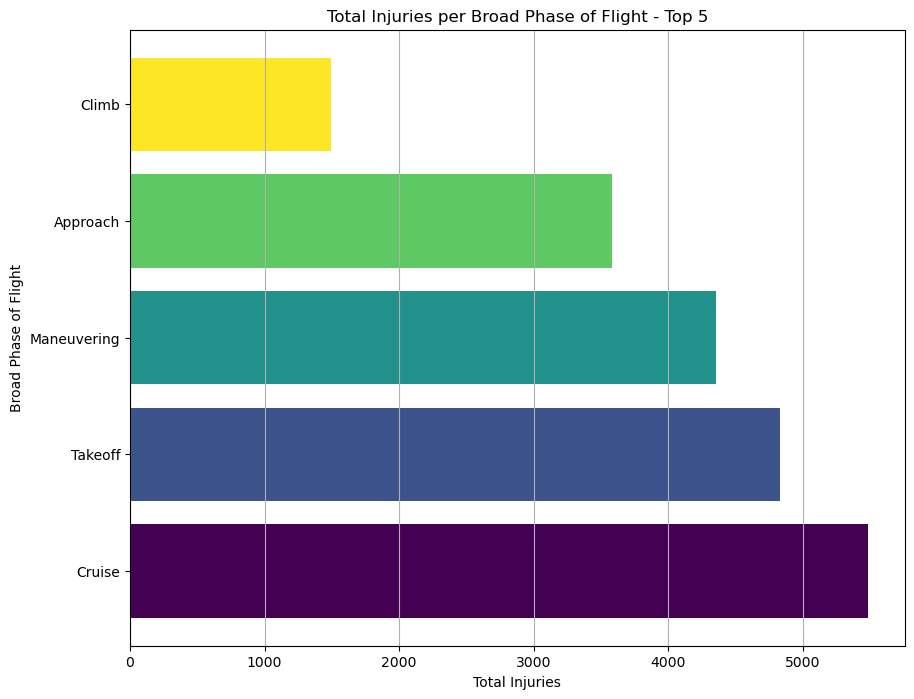

In [104]:

# Sort 'filtered_num_phase' by 'Total Injuries' in descending order and select the top 5
top_filtered_num_phase = filtered_num_phase.sort_values('Total Injuries', ascending=False).head(5)

# Calculate the number of colors needed for the top 5
num_colors = len(top_filtered_num_phase['Broad.phase.of.flight'])
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Plotting
plt.figure(figsize=(10, 8))
bar = plt.barh(top_filtered_num_phase['Broad.phase.of.flight'], top_filtered_num_phase['Total Injuries'], color=colors)
plt.xlabel('Total Injuries')
plt.ylabel('Broad Phase of Flight')
plt.title('Total Injuries per Broad Phase of Flight - Top 5')
plt.grid(axis='x')

# Show the plot
plt.show()

### Injury Percentages by Aircraft Make and Phase of Flight

 Now that we have a general outline of Injury percentages based on phase of flight, we are going to delve deeper and filter the data by make and number of engines.  The idea behind this is to understand which Aircrafts have the highest and lowest injury percentage per phase of flight in order to determine an appropriate resolution for stakeholders.

In [66]:
# Group by specified columns and aggregate Total Injuries
phase_counts = planes_df.groupby(['Broad.phase.of.flight', 'Number.of.Engines', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
phase_counts.columns = ['Broad.phase.of.flight', 'Number.of.Engines', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
phase_counts['Injury Percentage'] = phase_counts['Total Injuries'] / phase_counts['Total Incidents']

# Sort the DataFrame by 'Injury Percentage' in descending order
phase_counts = phase_counts[(phase_counts['Total Incidents'] > 10) & (phase_counts['Number.of.Engines'] <= 8)]

#create filtered_phase to show injury percentage per phase of flight for incident counts over 500
filtered_phase = phase_counts.groupby(['Broad.phase.of.flight', 'Number.of.Engines', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
filtered_phase = filtered_phase[filtered_phase['Total Incidents'] > 500]
filtered_phase['Injury Percentage'] = filtered_phase['Total Injuries'] / filtered_phase['Total Incidents']
filtered_phase.sort_values(by='Injury Percentage', ascending=False)

,Broad.phase.of.flight,Number.of.Engines,Make,Total Injuries,Total Incidents,Injury Percentage
233,Maneuvering,1.0,Cessna,1072.6,1750,0.612914
73,Cruise,1.0,Beech,302.6,513,0.589864
257,Maneuvering,1.0,Piper,578.4,991,0.583653
98,Cruise,1.0,Piper,959.4,1732,0.553926
302,Takeoff,1.0,Beech,262.4,538,0.487732
24,Approach,1.0,Piper,445.8,970,0.459588
76,Cruise,1.0,Cessna,1321.0,3170,0.416719
230,Maneuvering,1.0,Bell,246.4,600,0.410667
326,Takeoff,1.0,Piper,753.8,2105,0.358100
11,Approach,1.0,Cessna,629.4,1807,0.348312


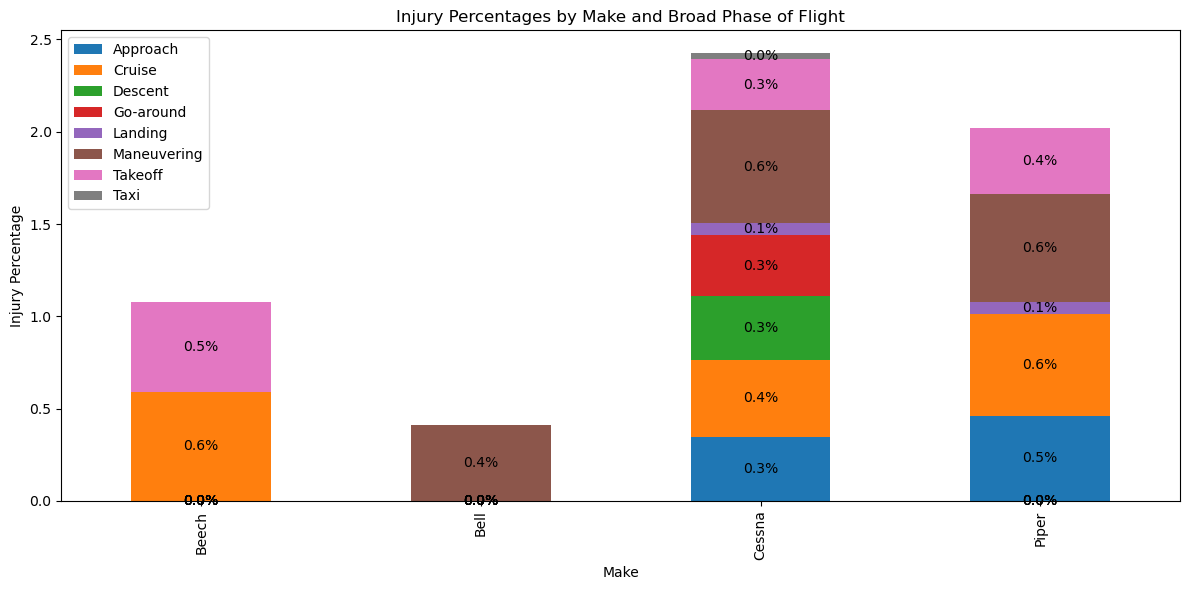

In [105]:

# Pivot data for 'Total Injuries'
# Assuming filtered_phase and pivot_percentage are already defined as per your code

# Creating subplots for the plot of injury percentages
fig, axes = plt.subplots(figsize=(12, 6))

# Plotting Injury Percentage
pivot_percentage.plot(kind='bar', stacked=True, ax=axes, title='Injury Percentages by Make and Broad Phase of Flight')
axes.set_ylabel('Injury Percentage')
axes.legend(loc='upper left')

# Adding numerical labels for each bar
for container in axes.containers:
    axes.bar_label(container, fmt='%.1f%%', label_type='center')  # Format labels as percentages with one decimal place

plt.tight_layout()
plt.show()


The chart presents a comparative analysis of injury percentages associated with different makes of aircraft across various phases of flight. Each stacked bar represents a unique aircraft make, with colored segments indicating the proportion of injuries that occurred during a specific phase of flight. Notable points include:

- Both Cessna and Piper makes show a higher percentage of injuries during Maneuvering (0.6%) and Cruise (0.3%).
- Beech aircrafts have a significant percentage of injuries occurring during the Taxi phase (0.5%).




### Injury Analysis by Engine Type

To finish off our analysis, we've grouped our aircraft data by `Engine Type` to analyze the relationship between the type of engine and the incidence of injuries. 

The resulting data offers insights into which engine types are more frequently associated with injuries, guiding potential safety improvements or further investigative research. The `Injury Percentage` column, in particular, standardizes the injury data to account for the number of incidents, allowing for an equitable comparison across engine types.


In [67]:

# Group by 'Engine.Type' and aggregate 'Total Injuries'
engine_injure = planes_df.groupby('Engine.Type')['Total Injuries'].agg(['sum', 'count']).reset_index()

# Calculate Injury Percentage correctly
# 'sum' refers to the total injuries, and 'count' refers to the number of incidents
engine_injure['Injury Percentage'] = engine_injure['sum'] / engine_injure['count']

# Rename columns to make them more descriptive
engine_injure.columns = ['Engine.Type', 'Total Injuries', 'Total Incidents', 'Injury Percentage']





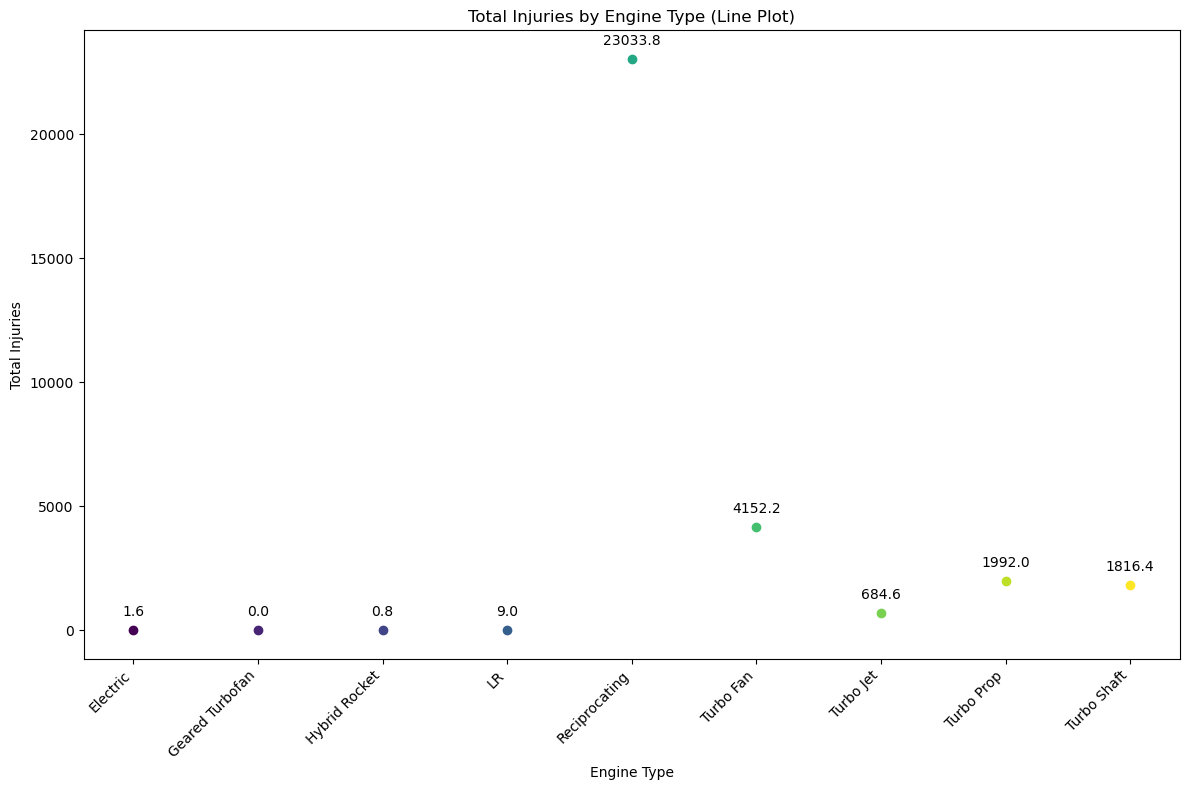

In [68]:
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Assuming Engine_filtered['Engine.Type'] is categorical and you want each category to have its own color
# First, ensure 'Engine.Type' is sorted if it isn't already, as you've done
Engine_filtered = engine_injure.sort_values(by='Engine.Type')

Engine_filtered = Engine_filtered[~Engine_filtered['Engine.Type'].str.lower().isin(['none', 'unk', 'unknown'])]


# Plot each point individually
for i, row in Engine_filtered.iterrows():
    plt.plot(row['Engine.Type'], row['Total Injuries'], marker='o', linestyle='', color=colors[i % len(colors)])

plt.xlabel('Engine Type')  # X-axis label
plt.ylabel('Total Injuries')  # Y-axis label
plt.title('Total Injuries by Engine Type (Line Plot)')  # Chart title

# Fix for the xticks error: manually set the ticks and labels
ticks = range(len(Engine_filtered['Engine.Type'].unique()))
labels = Engine_filtered['Engine.Type'].unique()
plt.xticks(ticks, labels, rotation=45, ha="right")

# Adding text labels for each marker
for i, txt in enumerate(Engine_filtered['Total Injuries']):
    # Adjusting the annotation to align with the corrected ticks
    plt.annotate(f"{txt:.1f}", (ticks[i % len(ticks)], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


### Analysis of Aircraft Engine Types and their Association with Injuries

The next analysis aims to take a deeper dive into the correlation between aircraft engine types, aircraft makes, and the total number of injuries reported. We perform a series of data manipulation steps to extract meaningful insights from the `planes_df` dataframe, which holds our aircraft incident data. The goal is to discern whether certain engine types, along with the number of engines and the aircraft make, have higher injury rates.

#### Additional Steps to Investigate Further:


- **Filtering by Injury Count**: We apply a filter to only include data where the `Total Injuries` are greater than 200 and `Number.of.Engines` is at least 1, focusing our analysis on more significant incidents.

- **Further Aggregation**: We aggregate again to sum the `Total Injuries`, `Total Incidents`, and recalculated `Injury Percentage` for groups with more than 500 total injuries, which highlights the most impactful data points.




In [69]:
 #Group by specified columns and aggregate Total Injuries
engine_t_outcome = planes_df.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])['Total Injuries'].agg(['sum', 'count']).reset_index()

# Rename columns
engine_t_outcome.columns = ['Number.of.Engines', 'Engine.Type', 'Make', 'Total Injuries', 'Total Incidents']

# Calculate Injury Percentage
engine_t_outcome['Injury Percentage'] = engine_t_outcome['Total Injuries'] / engine_t_outcome['Total Incidents']

engine_t_outcome = engine_t_outcome[(engine_t_outcome['Total Injuries'] > 200) & (engine_t_outcome['Number.of.Engines'] >= 1)]

#Filter overall results by best fitting cases of total injuries >500
engine_t_filter_outcome = engine_t_outcome.groupby(['Number.of.Engines', 'Engine.Type', 'Make'])[['Total Injuries', 'Total Incidents', 'Injury Percentage']].sum().reset_index()
engine_t_filter_outcome = engine_t_filter_outcome[engine_t_filter_outcome['Total Injuries'] > 500]
engine_t_filter_outcome['Injury Percentage'] = engine_t_filter_outcome['Total Injuries'] / engine_t_filter_outcome['Total Incidents']

### Create visualization to represent 

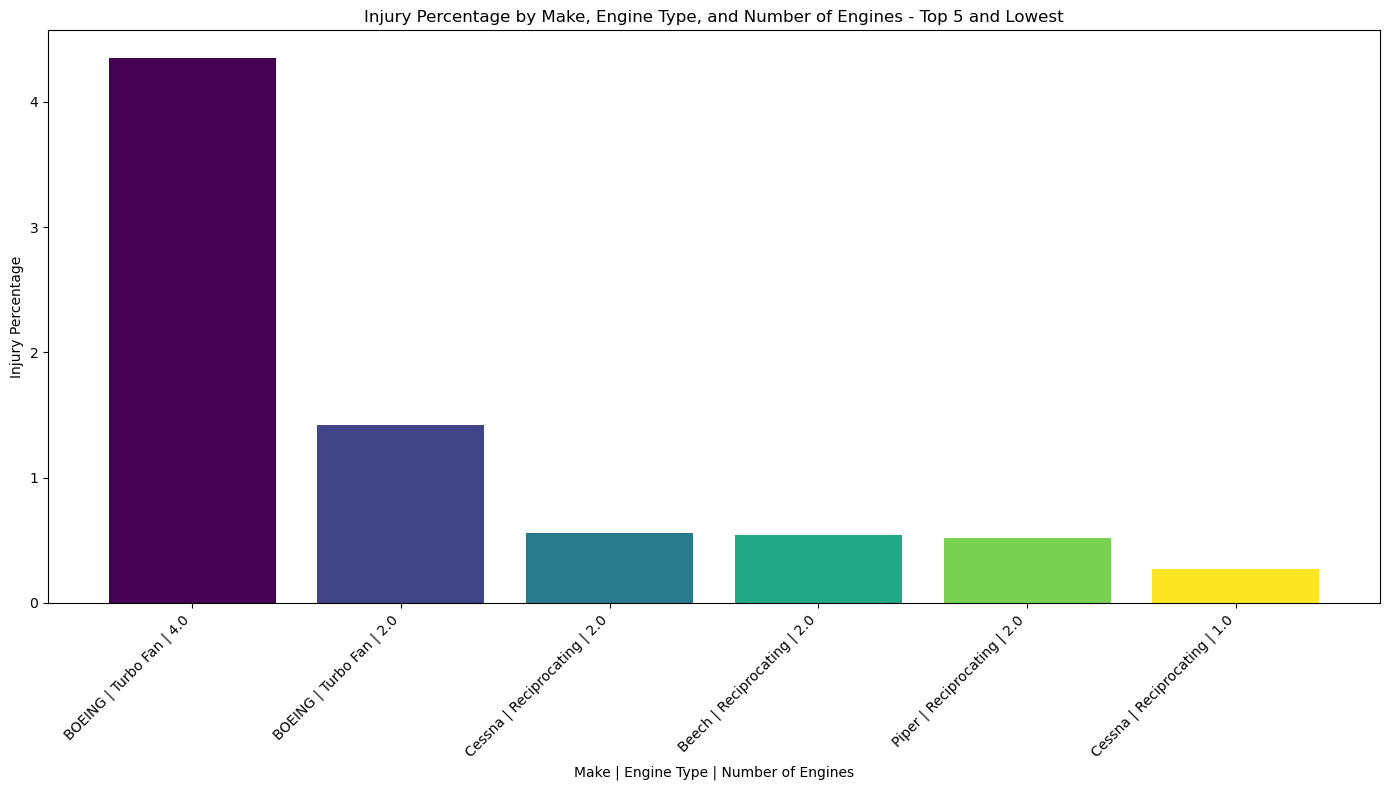

In [110]:


# Sort by 'Injury Percentage' in descending order and select the top 5
top_engine_t_filter_outcome = engine_t_filter_outcome.sort_values('Injury Percentage', ascending=False).head(5)

# Find the lowest 'Injury Percentage' not in the top 5
lowest_injury_percentage = engine_t_filter_outcome.loc[~engine_t_filter_outcome.index.isin(top_engine_t_filter_outcome.index)].nsmallest(1, 'Injury Percentage')

# Combine the top 5 with the lowest injury percentage entry
final_dataframe = pd.concat([top_engine_t_filter_outcome, lowest_injury_percentage])

# Update the 'Label' column in case it's not up-to-date
final_dataframe['Label'] = final_dataframe['Make'] + ' | ' + final_dataframe['Engine.Type'] + ' | ' + final_dataframe['Number.of.Engines'].astype(str)

# Generate colors
colors = plt.cm.viridis(np.linspace(0, 1, len(final_dataframe['Label'])))

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(final_dataframe['Label'], final_dataframe['Injury Percentage'], color=colors)
plt.xlabel('Make | Engine Type | Number of Engines')
plt.ylabel('Injury Percentage')
plt.xticks(rotation=45, ha="right")
plt.title('Injury Percentage by Make, Engine Type, and Number of Engines - Top 5 and Lowest')
plt.tight_layout()

plt.show()





The bar chart presents the injury percentage, offering a proportional view of injuries relative to the number of incidents. 

The 'Boeing Turbo Fan 4.0' stands out with the highest injury percentage, indicating that while there may be fewer total injuries, the incidents involving this configuration are more likely to result in an injury.

Based on the above data on enginge types, Cessna Reciprocating 1 engine planes appear to also be the safest to fly based on the amount of incidents and resulting low injury percentage (just under 30%)

## Conclusion
This analysis has led to several key insights and recommendations for considering the expansion into the aviation industry, specifically focusing on the purchase and operation of aircraft for commercial and private purposes:

**Personal Aircraft Selection:** Analysis of injury data for aircraft with a "personal" phase of flight has identified Cessna (single-engine) and Piper (dual-engine) as the makes with the lowest injury percentages. These findings suggest that these aircraft types present the lowest risk and are recommended for selection in expanding into the aviation sector.

**Commercial and Military Aircraft Selection:** Injury data for aircrafts with 2 or more engines (designated as commercial and military for this analysis), Boeing aircrafts have the highest injury percentage per crash with both 3 and 4 engine planes. Mcdonnell Douglas also has a high injury percentage with their 4 engine aircrafts.  

A concrete business takeaway from this display could be to go with AIRBUS for commercial and Lockheed for Military, respectively.

**Phase of Flight Safety Analysis:** By aggregating and analyzing total injuries and incidents by flight phase, the study offers valuable insights into which phases of flight (e.g., Cruise, Takeoff, Maneuvering, Landing) are most associated with injuries. This information is critical for developing targeted safety protocols and training programs to mitigate risks during identified high-risk flight phases.


**Engine Type:** Although Cessna Reciprocating 1 engine planes have the most injuries, they appear to also be the safest to fly based on the amount of incidents and resulting low injury percentage (just under 30%)

### Next Steps
To further refine the company's approach to entering the aviation industry and ensure a well-informed decision-making process, the following analyses are recommended:

**Comprehensive Risk Assessment by Aircraft Make and Model:** Extend the analysis to include a broader range of aircraft makes and models, considering other factors such as maintenance history, age of aircraft, and historical performance under different operational conditions.

**Advanced Modeling for Predicting Accidents and Injuries:** Utilize machine learning models to predict the likelihood of accidents and injuries based on a comprehensive set of variables, including aircraft characteristics, flight conditions, pilot experience, and environmental factors.

**Evaluation of Training and Safety Programs:** Assess the effectiveness of existing training and safety programs across different phases of flight and for various aircraft makes and models. This could help in developing specialized training programs aimed at reducing the risk of injuries and accidents.